# **Whole dataset clustering**

### **Data preperation and clustering**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

ModuleNotFoundError: No module named 'numpy'

In [2]:
clustering = pd.read_csv('Data\whole_clustering.csv')
cluster = KMeans(n_clusters = 4)
cols = clustering.columns[:]
clustering.drop(clustering.columns[[0]], axis = 1, inplace = True)

So for my clustering analysis of the whole study I would like to see if the studies as a whole have interesting cluster patterns. To do this step I will have to map an integer value to the study so that clustering can take place. I am focusing on the profit/loss margins of the individual subjects and I am also going to look at their total zeros received. This tells us how often the subjects didn't lose money. The lower this figure is indicates that the subjects were losing money more regularly.

In [3]:
y_predicted = cluster.fit_predict(clustering[["Margin","count_zeros"]])
clustering["cluster"] = y_predicted
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros,cluster
0,Subj_1,5800,-4650,Fridberg,1150,80,1
1,Subj_2,7250,-7925,Fridberg,-675,71,3
2,Subj_3,7100,-7850,Fridberg,-750,76,3
3,Subj_4,7000,-7525,Fridberg,-525,76,3
4,Subj_5,6450,-6350,Fridberg,100,76,1


This is the results of our clustering based on the amount of zeros each subject chose and their respective margin of profit and loss.

Text(0, 0.5, 'count_zeros')

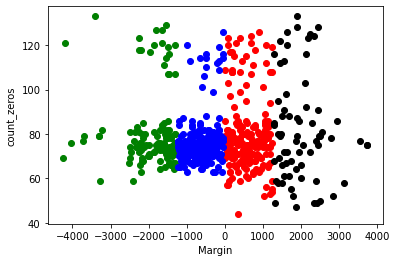

In [4]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Margin, df1.count_zeros, color='green')
plt.scatter(df2.Margin, df2.count_zeros, color='red')
plt.scatter(df3.Margin, df3.count_zeros, color='black')
plt.scatter(df4.Margin, df4.count_zeros, color='blue')

plt.xlabel("Margin")
plt.ylabel("count_zeros")

### **Normalization and refined clustering**

Below we can see the dataframe after normalization has taken place.

In [5]:
clustering[['Margin','count_zeros']] = minmax_scale(clustering[['Margin','count_zeros']])
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clustering[["Margin", "count_zeros"]])
clustering["cluster"] = y_predicted
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros,cluster
0,Subj_1,5800,-4650,Fridberg,0.675000,0.404494,0
1,Subj_2,7250,-7925,Fridberg,0.446875,0.303371,1
2,Subj_3,7100,-7850,Fridberg,0.437500,0.359551,1
3,Subj_4,7000,-7525,Fridberg,0.465625,0.359551,1
4,Subj_5,6450,-6350,Fridberg,0.543750,0.359551,1


In [6]:
km.cluster_centers_

array([[0.69127056, 0.31601124],
       [0.50012703, 0.34196584],
       [0.53452744, 0.79761579],
       [0.31934307, 0.33429017]])

The below graph differs from the original in two mains ways. As I have mentioned already the data is now standarized, this should imrove the overall clustering of the dataset. I have also calculated the centroids of the clusters and added them to the graph giving us some added information.

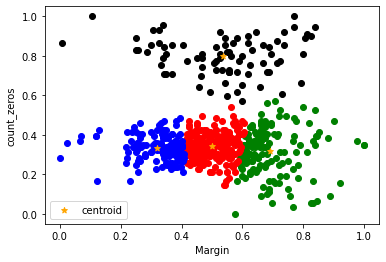

In [7]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Margin, df1.count_zeros, color='green')
plt.scatter(df2.Margin, df2.count_zeros, color='red')
plt.scatter(df3.Margin, df3.count_zeros, color='black')
plt.scatter(df4.Margin, df4.count_zeros, color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="orange", marker="*", label="centroid")

plt.xlabel("Margin")
plt.ylabel("count_zeros")
plt.legend()

### **Further analysis**

In [8]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(clustering[["Margin", "count_zeros"]])
    sse.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Below is a diagram of the elbow method. This enable us to find the optimum number of clusters in the dataset. It is the most popular method when dealing with k means clustering to calculate this. From the graph below you can the elbow starts to bend at 3 indicating that the optimum number of clusters would be three and that the results may improve with a correction.

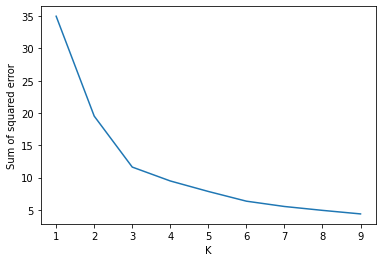

In [9]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)

Here we have an informative scatterplot of the different studies and the participants. You can clearly see that the subjects from both Steingrover and Wetzels more often than not did not lose money and still gained a respective amount of money. Another interesting observation is that some of the participants that were not receiving many zeros, so as a result were losing money in some cases still gained a large amount of money. This tells us that these participants found the more beneficial cards but reaped the downside to those cards also.

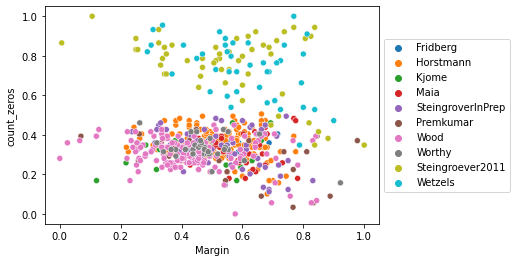

In [10]:
sns.scatterplot(data=clustering, x="Margin", y="count_zeros", hue="Study")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))